In [ ]:
#########################
# read all files from get_familiar
# save them in a dictionary of datasets

import pandas as pd
import os

data_dir = '../d1_get_familiar/data/get_familiar'
datasets = {}
for file in os.listdir(data_dir):
    if file.endswith('.feather'):
        dataset_name = file[:file.index('_person')]
        datasets[dataset_name] = pd.read_feather(os.path.join(data_dir, file))


In [ ]:
# the names of the datasets
print(datasets.keys(), '\n')
# check the sizes of datasets
total_size = 0
for name, df in datasets.items():
    size = df.memory_usage(deep=True).sum()
    total_size += size
    print(f"Dataset '{name}' size: {size / (1024 ** 2):.2f} MB")
print(f"\nTotal size of all datasets: {total_size / (1024 ** 2):.2f} MB")


dict_keys(['insulin', 'ecg', 'breathing', 'glucose', 'accel', 'summary']) 

Dataset 'insulin' size: 0.00 MB
Dataset 'ecg' size: 99.12 MB
Dataset 'breathing' size: 9.91 MB
Dataset 'glucose' size: 0.09 MB
Dataset 'accel' size: 79.30 MB
Dataset 'summary' size: 6.94 MB

Total size of all datasets: 195.36 MB


So it's ~150MB for 1 person for 1 day

=> we have (9 ppl) x (~5 days) x (150MB) = __6.5 GB__ of data JUST from D1namo

=> Gonna practice and develop on small chunks from different dataset,

then add more and more data

In [ ]:
9*5*150/1024

6.591796875

In [ ]:
# measured every 4 microseconds
print(datasets['ecg'].info())
datasets['ecg']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6496000 entries, 2014-10-04 06:34:57.423000 to 2014-10-04 13:48:01.419000
Data columns (total 1 columns):
 #   Column       Dtype
---  ------       -----
 0   EcgWaveform  int64
dtypes: int64(1)
memory usage: 99.1 MB
None


,EcgWaveform
datetime,
2014-10-04 06:34:57.423,297
2014-10-04 06:34:57.427,297
2014-10-04 06:34:57.431,297
2014-10-04 06:34:57.435,297
2014-10-04 06:34:57.439,297
...,...
2014-10-04 13:48:01.403,1956
2014-10-04 13:48:01.407,1956
2014-10-04 13:48:01.411,1957


<Axes: title={'center': 'ECG Signal (First 5000 samples)'}, xlabel='datetime'>

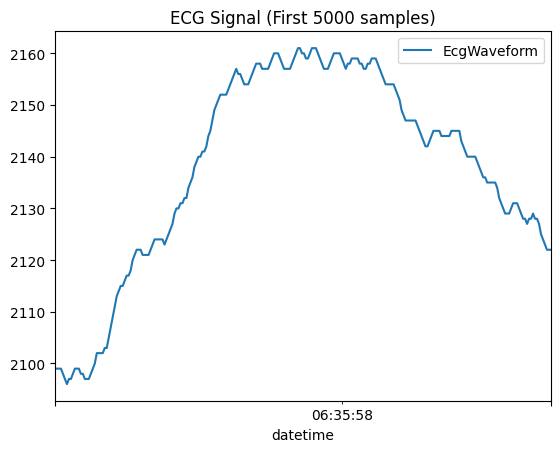

In [ ]:
datasets ['ecg'].iloc[15000:15250].plot(y='EcgWaveform', title='ECG Signal (First 5000 samples)')

In [ ]:
# measured every 5 minutes from day 1 until day 6
# cgm = continuous glucose monitor
print(datasets['glucose'].info())
datasets['glucose']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1438 entries, 2014-10-01 19:14:00 to 2014-10-06 16:54:02
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   glucose  1438 non-null   float64
 1   type     1438 non-null   object 
dtypes: float64(1), object(1)
memory usage: 33.7+ KB
None


,glucose,type
datetime,,
2014-10-01 19:14:00,10.3,cgm
2014-10-01 19:19:00,9.9,cgm
2014-10-01 19:23:00,9.4,manual
2014-10-01 19:24:00,9.8,cgm
2014-10-01 19:29:00,9.6,cgm
...,...,...
2014-10-06 16:34:02,12.3,cgm
2014-10-06 16:39:02,12.5,cgm
2014-10-06 16:44:02,12.5,cgm


In [ ]:
# lots of aggregated measures including SKIN TEMP, HRV, etc.
# measured every 1 second for ONE DAY

print(datasets['summary'].info())
datasets['summary']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25984 entries, 2014-10-04 06:34:57.423000 to 2014-10-04 13:48:00.423000
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                25984 non-null  int64  
 1   BR                25984 non-null  float64
 2   SkinTemp          25984 non-null  float64
 3   Posture           25984 non-null  int64  
 4   Activity          25984 non-null  float64
 5   PeakAccel         25984 non-null  float64
 6   BatteryVolts      25984 non-null  float64
 7   BatteryLevel      25984 non-null  int64  
 8   BRAmplitude       25984 non-null  float64
 9   BRNoise           25984 non-null  float64
 10  BRConfidence      25984 non-null  int64  
 11  ECGAmplitude      25984 non-null  float64
 12  ECGNoise          25984 non-null  float64
 13  HRConfidence      25984 non-null  int64  
 14  HRV               25984 non-null  int64  
 15  SystemConfidence  25984 non-null  int6

,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,BRNoise,...,SagittalPeak,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3
datetime,,,,,,,,,,,,,,,,,,,,,
2014-10-04 06:34:57.423,65,8.1,-3276.8,-61,0.60,1.46,4.166,94,6046.0,65535.0,...,1.31,27.1,528,255,-128,-128,6553.5,414,422,484
2014-10-04 06:34:58.423,65,8.1,-3276.8,-49,0.54,0.92,4.166,94,5350.0,65535.0,...,0.93,27.1,528,255,-128,-128,6553.5,415,423,483
2014-10-04 06:34:59.423,65,7.3,-3276.8,-22,0.68,1.09,4.166,94,4673.0,65535.0,...,0.24,27.1,528,255,-128,-128,6553.5,425,431,485
2014-10-04 06:35:00.423,65,7.3,-3276.8,22,0.39,0.56,4.166,94,4025.0,65535.0,...,-0.24,27.1,528,255,-128,-128,6553.5,416,423,483
2014-10-04 06:35:01.423,65,6.6,-3276.8,27,0.35,0.86,4.166,94,3500.0,65535.0,...,-0.06,27.1,528,255,-128,-128,6553.5,412,419,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-04 13:47:56.423,0,18.4,-3276.8,-7,0.07,0.10,3.888,48,67.0,65535.0,...,0.22,32.4,531,255,-128,-128,35.3,409,419,461
2014-10-04 13:47:57.423,0,17.7,-3276.8,-7,0.07,0.08,3.888,48,60.0,65535.0,...,0.12,32.4,531,255,-128,-128,35.3,414,420,483
2014-10-04 13:47:58.423,0,17.7,-3276.8,-7,0.05,0.08,3.888,48,53.0,65535.0,...,0.12,32.4,531,255,-128,-128,35.3,419,424,486


In [ ]:
datasets ['insulin'].isnull().sum()

fast_insulin     0
slow_insulin    16
dtype: int64

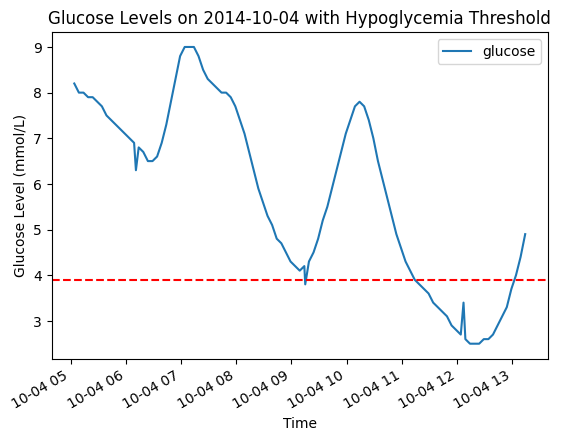

In [ ]:
#
datasets['glucose'].loc['2014-10-04 05:00:00':'2014-10-04 13:15:00'].plot(y='glucose')

import matplotlib.pyplot as plt
plt.axhline(y=3.9, color='r', linestyle='--')
plt.title('Glucose Levels on 2014-10-04 with Hypoglycemia Threshold')
plt.xlabel('Time')
plt.ylabel('Glucose Level (mmol/L)')
plt.show()

Train_test split


In [7]:
cd ~/code/sasha17demin/hypopredict

/home/musa/code/sasha17demin/hypopredict


In [8]:
# you should already be here
#cd ~/code/sasha17demin/hypopredict
! pip install -e .

Obtaining file:///home/musa/code/sasha17demin/hypopredict
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for hypopredict (pyproject.toml) ... done
  Created wheel for hypopredict: filename=hypopredict-0.0.1-0.editable-py3-none-any.whl size=2920 sha256=e33165bc5ab68c7708500262b604fd62d6c920772f30a891b861076ee1dc268a
  Stored in directory: /tmp/pip-ephem-wheel-cache-59ilux5u/wheels/97/38/9b/56be2e0cf00765afcf34b6d11c6f5632c66d4cdb0faa5fc77e
Successfully built hypopredict
  Attempting uninstall: hypopredict
    Found existing installation: hypopredict 0.0.1
    Not uninstalling hypopredict at /home/musa/code/sasha17demin/hypopredict, outside environment /home/musa/.pyenv/versions/3.12.9/envs/hypopredict
    Can't uninstall 'hypopredict'. No files were found to uninstall.


In [9]:
! pip freeze | grep hypopredict

hypopredict==0.0.1


In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
from hypopredict import train_test_split

In [12]:
train_test_split.hello()

Hello from hypopredict.train_test_split module!!


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [14]:
# Load ECG data for 1 subject, day 4
# https://drive.google.com/file/d/1URua1BRmcTgkwU1nGPWRkrxhabWVotxH/view?usp=share_link

# Convert Google Drive link to direct download format
#https://drive.google.com/file/d/1URua1BRmcTgkwU1nGPWRkrxhabWVotxH/view?usp=drive_link
file_id = '1URua1BRmcTgkwU1nGPWRkrxhabWVotxH'
url = f'https://drive.google.com/uc?id={file_id}&export=download'

df_tochunk = pd.read_feather(url) # ecg

In [15]:
# larger chunks => more context for model to learn from
CHUNK_SIZE = 60 * 60 * 250  # 60 minutes in number of samples

In [16]:
# larger step size => less overlap between chunks => less data + less overfitting
STEP_SIZE = 60*250  # 60 seconds in number of samples
# its ECG data so a 60 second slide is pretty large

In [17]:
chunks = train_test_split.chunkify(df_tochunk, CHUNK_SIZE, STEP_SIZE)


In [19]:
# Load glucose data for 1 subject, all days
# https://drive.google.com/file/d/1qGfSIb9EEJ4ZxlWnBcsILgh9LbHAiMld/view?usp=share_link

file_id = '1qGfSIb9EEJ4ZxlWnBcsILgh9LbHAiMld'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
gl_d1 = pd.read_feather(url) # glucose same person, all days

In [20]:
###### CALCULATING TARGET LABELS ######
onset_times = train_test_split.get_HG_onset_times(gl_d1, threshold=3.9)

In [21]:
# predict HG onset in the next 30 mins
FORECAST_WINDOW = pd.Timedelta(minutes=30)

In [22]:
target_labels = train_test_split.generate_target_labels(chunks,
                                        onset_times=onset_times,
                                        forecast_window=FORECAST_WINDOW)

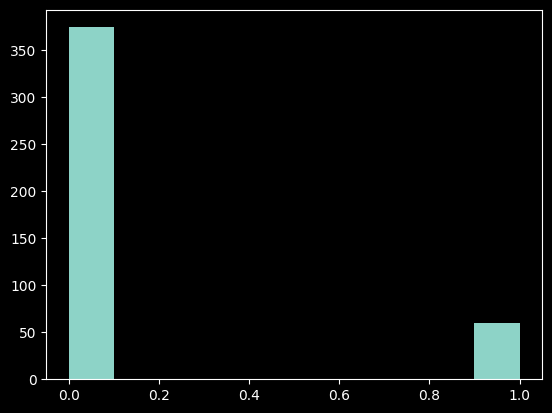

In [23]:
plt.hist(target_labels);

In [24]:
SAMPLING_RATE = 250  # Hz
TEST_SIZE = 0.2  # 20% for testing

X_train, X_test, y_train, y_test = train_test_split.train_test_split_chunks(
    chunks,
    chunk_size=CHUNK_SIZE,
    step_size=STEP_SIZE,
    target_labels=target_labels,
    forecast_window=FORECAST_WINDOW,
    sampling_rate=SAMPLING_RATE,
    test_size=TEST_SIZE
)

In [25]:
len(X_train)

256

In [26]:
len(y_train)

256

In [27]:
list(map(lambda x: x.shape[0], X_train))

[900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logit = LogisticRegression()

In [30]:
len(X_train), X_train[0].shape

(256, (900000, 1))

In [31]:
#logit.fit(X_train, y_train)

In [32]:
#### FEATUTE ENGINNERRING LOOP

X_train_final = pd.DataFrame()

for i in range(len(X_train)):

    descr_stat_for_chunk = X_train[i].mean().values

    ## any function you want

    X_train_final = pd.concat([X_train_final, pd.Series(descr_stat_for_chunk)], axis=0)

In [33]:
X_train[0].mean().values

array([1994.80160111])

In [34]:
X_train_final

,0
0,1994.801601
0,1990.102278
0,1987.327432
0,1985.392579
0,1985.219796
...,...
0,1979.737291
0,1980.256246
0,1980.140260
0,1980.529348


In [35]:
y_train_final = np.array(y_train)

In [36]:
y_train_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
logit.fit(X_train_final, y_train_final)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
LogisticRegression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
logit.predict_proba(X_train_final)


array([[0.76704812, 0.23295188],
       [0.7665461 , 0.2334539 ],
       [0.76624931, 0.23375069],
       [0.76604221, 0.23395779],
       [0.76602371, 0.23397629],
       [0.76593612, 0.23406388],
       [0.76591361, 0.23408639],
       [0.76587784, 0.23412216],
       [0.76581072, 0.23418928],
       [0.76583957, 0.23416043],
       [0.76584444, 0.23415556],
       [0.76581839, 0.23418161],
       [0.76580475, 0.23419525],
       [0.76581603, 0.23418397],
       [0.76580384, 0.23419616],
       [0.76581039, 0.23418961],
       [0.76579926, 0.23420074],
       [0.76580384, 0.23419616],
       [0.76576786, 0.23423214],
       [0.76577687, 0.23422313],
       [0.76579945, 0.23420055],
       [0.76578029, 0.23421971],
       [0.76576834, 0.23423166],
       [0.76575974, 0.23424026],
       [0.76579793, 0.23420207],
       [0.76576473, 0.23423527],
       [0.76575861, 0.23424139],
       [0.76574052, 0.23425948],
       [0.76574196, 0.23425804],
       [0.76573925, 0.23426075],
       [0.

In [40]:
# check precision-recall auc
from sklearn.metrics import precision_recall_curve, auc

y_scores = logit.predict_proba(X_train_final)[:, 1]
precision, recall, _ = precision_recall_curve(y_train_final, y_scores)
pr_auc = auc(recall, precision)
pr_auc

0.2782221621680094

In [41]:
logit.predict(X_train_final)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# check precision
from sklearn.metrics import precision_score
precision_score(y_train_final, logit.predict(X_train_final))

/home/musa/.pyenv/versions/hypopredict/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.0

In [60]:
from sklearn.ensemble import  RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
# Feature engineering loop for Random Forest
X_train_final_rf = pd.DataFrame()

In [62]:
# instead of mean, we can use more features
for i in range(len(X_train)):

    descr_stat_for_chunk = X_train[i].mean().values

    ## any function you want

    X_train_final_rf = pd.concat([X_train_final_rf, pd.Series(descr_stat_for_chunk)], axis=0)

In [63]:
X_train_final_rf

,0
0,1994.801601
0,1990.102278
0,1987.327432
0,1985.392579
0,1985.219796
...,...
0,1979.737291
0,1980.256246
0,1980.140260
0,1980.529348


In [64]:
# fit the random forest model
rf.fit(X_train_final_rf, y_train_final)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# dataframe with row per chunk and features as columns
rf.predict(X_train_final_rf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
X_test_final_rf = pd.DataFrame()

In [69]:
# instead of mean, we can use more features
for i in range(len(X_test)):

    descr_stat_for_chunk = X_test[i].mean().values

    ## any function you want

    X_test_final_rf = pd.concat([X_test_final_rf, pd.Series(descr_stat_for_chunk)], axis=0)

In [71]:
rf.predict(X_test_final_rf)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [72]:
X_test_final_rf

,0
0,1981.419878
0,1981.192236
0,1981.378200
0,1981.316801
0,1981.333033
...,...
0,1975.860393
0,1979.118630
0,1983.616452
0,1987.850563


In [74]:
y_test_final = np.array(y_test)


In [75]:
y_test_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# print precision recall auc for test set
y_scores_test = rf.predict_proba(X_test_final_rf)[:, 1]
precision_test, recall_test, _ = precision_recall_curve(y_test_final, y_scores_test)
pr_auc_test = auc(recall_test, precision_test)
pr_auc_test

/home/musa/.pyenv/versions/hypopredict/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


0.5

In [ ]:
# save RandonForest model into pickle file
import pickle
with open('models/Musa/rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
#Load RandonForest model from pickle file
import pickle
with open('models/Musa/rf_model.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

In [80]:
rf_loaded

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
rf_loaded.predict(X_test_final_rf)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

XGBoost

In [ ]:
# XGBoost model
from xgboost import XGBClassifier

In [ ]:
# feature engineering loop for XGBoost
X_train_final_xgb = pd.DataFrame()
# instead of mean, we can use more features
for i in range(len(X_train)):

    descr_stat_for_chunk = X_train[i].mean().values

    ## any function you want

    X_train_final_xgb = pd.concat([X_train_final_xgb, pd.Series(descr_stat_for_chunk)], axis=0)